In [0]:
from __future__ import print_function
from sklearn import datasets
from skimage import exposure
import numpy as np
import pandas as pd
import h5py
import cv2
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
file="/content/gdrive/My Drive/SVHN_single_grey1.h5"

In [0]:
h5f = h5py.File(file, 'r')

In [0]:
trainX = h5f['X_train'][:]
trainy = h5f['y_train'][:]
testx = h5f['X_test'][:]
testy = h5f['y_test'][:]
valx = h5f['X_val'][:]
valy = h5f['y_val'][:]

In [47]:
print(trainX.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)
print(valx.shape)
print(valy.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


In [0]:
trainx_k = np.reshape(trainX,(trainX.shape[0],-1))

In [49]:
trainx_k.shape

(42000, 1024)

In [0]:
testx_k = np.reshape(testx,(testx.shape[0],-1))
valx_k = np.reshape(valx,(valx.shape[0],-1))

In [51]:
print(testx_k.shape)
print(valx_k.shape)

(18000, 1024)
(60000, 1024)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
accuracy = []

model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainx_k, trainy)

score = model.score(valx_k, valy)
print(score * 100)
accuracy.append(score)

83.775


In [0]:
df_predict = model.predict(testx_k)

In [30]:
print(classification_report(testy, df_predict))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

    accuracy                           0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000



In [31]:
print(confusion_matrix(testy, df_predict))

[[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  610   88  229   82   80  149  121]
 [  85  195   51   71 1039   55  111   35   98   72]
 [  94  103   71  220   54  588  203   48  205  182]
 [ 225   74   51   72  102  154  711   33  295  115]
 [  65  173  146  100   34   38   48 1071   53   80]
 [ 150   62   59  130   86  153  267   44  675  186]
 [ 238   87   89  115   60  113  115   65  192  730]]


In [0]:
import keras
import tensorflow as tf
from keras import optimizers

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Labels: [2 6 7 4 4 0 3 0 7 3]


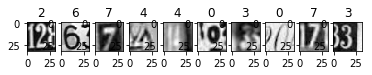

In [54]:
for i in range(0,10): 
    plt.subplot(1,10,(i+1))
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    plt.title(trainy[i]);
print("Labels:",trainy[0:10])

In [0]:
model_nn = tf.keras.Sequential()
model_nn.add(tf.keras.layers.Flatten(input_shape=(32,32,)))
model_nn.add(tf.keras.layers.Dense(1000,activation='relu'))
model_nn.add(tf.keras.layers.Dropout(0.5))
model_nn.add(tf.keras.layers.Dense(500,activation='relu'))
model_nn.add(tf.keras.layers.Dropout(0.5))
model_nn.add(tf.keras.layers.Dense(100,activation='relu'))
model_nn.add(tf.keras.layers.Dropout(0.3))
model_nn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model_nn.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [69]:
print(trainX.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)
print(valx.shape)
print(valy.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


In [70]:
model_nn.fit(trainX, trainy, 
          validation_data=(valx, valy), 
          epochs=50,batch_size=trainX.shape[0])

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 10s 230us/sample - loss: 280.4265 - acc: 0.1017 - val_loss: 1680.7314 - val_acc: 0.0990
Epoch 2/50
42000/42000 [==============================] - 10s 229us/sample - loss: 2527.9524 - acc: 0.0979 - val_loss: 7304.8297 - val_acc: 0.1000
Epoch 3/50


KeyboardInterrupt: ignored

In [71]:
model_nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1025000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               50100     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)              

In [0]:
model_nn1 = tf.keras.Sequential()

model_nn1.add(tf.keras.layers.Flatten(input_shape=(32,32,)))
model_nn1.add(tf.keras.layers.BatchNormalization())
model_nn1.add(tf.keras.layers.Dense(1000,activation='relu'))
model_nn1.add(tf.keras.layers.BatchNormalization())
model_nn1.add(tf.keras.layers.Dropout(0.5))
model_nn1.add(tf.keras.layers.Dense(500,activation='relu'))
model_nn1.add(tf.keras.layers.BatchNormalization())
model_nn1.add(tf.keras.layers.Dropout(0.5))
model_nn1.add(tf.keras.layers.Dense(100,activation='relu'))
model_nn1.add(tf.keras.layers.Dropout(0.30))
model_nn1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model_nn1.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [74]:
model_nn1.fit(trainX, trainy, 
          validation_data=(valx, valy), 
          epochs=100,batch_size=trainX.shape[0])

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 14s 328us/sample - loss: 3.8237 - acc: 0.1048 - val_loss: 33.6265 - val_acc: 0.1005
Epoch 2/100
42000/42000 [==============================] - 13s 316us/sample - loss: 3.7703 - acc: 0.1071 - val_loss: 22.5211 - val_acc: 0.0985
Epoch 3/100
42000/42000 [==============================] - 13s 316us/sample - loss: 3.7383 - acc: 0.1079 - val_loss: 17.5902 - val_acc: 0.0962
Epoch 4/100
42000/42000 [==============================] - 13s 316us/sample - loss: 3.6997 - acc: 0.1071 - val_loss: 14.6482 - val_acc: 0.0959
Epoch 5/100
42000/42000 [==============================] - 13s 318us/sample - loss: 3.6500 - acc: 0.1089 - val_loss: 12.6679 - val_acc: 0.0959
Epoch 6/100
42000/42000 [==============================] - 13s 319us/sample - loss: 3.6038 - acc: 0.1083 - val_loss: 11.1781 - val_acc: 0.0960
Epoch 7/100
42000/42000 [==============================] - 13s 318us/sample - loss: 3.5983 -

In [78]:
model_nn1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              1025000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4000      
_________________________________________________________________
dropout_18 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 500)               500500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 500)              

In [0]:
accscore = model_nn1.evaluate(testx, testy, verbose=0)

In [80]:
print(accscore)

[2.1795097268422445, 0.22716667]


In [0]:
from keras.layers import Convolution2D, MaxPooling2D,Dense, Activation, Dropout, Flatten, Reshape
from keras.models import Sequential
from keras.utils import np_utils

In [0]:
trainX_cnn = trainX.reshape(trainX.shape[0], 32,32,1).astype('float32')
testx_cnn = testx.reshape(testx.shape[0], 32,32,1).astype('float32')
valx_cnn = valx.reshape(valx.shape[0], 32,32,1).astype('float32')

In [83]:
print(trainX_cnn.shape)
print(testx_cnn.shape)
print(valx_cnn.shape)

(42000, 32, 32, 1)
(18000, 32, 32, 1)
(60000, 32, 32, 1)


In [84]:
model_cnn = Sequential()
    

model_cnn.add(Convolution2D(32, 3, 3, input_shape=(32,32,1)))
model_cnn.add(Activation('relu'))

model_cnn.add(Convolution2D(32, 3, 3))
model_cnn.add(Activation('relu'))

model_cnn.add(Flatten())
model_cnn.add(Dense(100))
model_cnn.add(Activation('relu'))

model_cnn.add(Dense(10))
model_cnn.add(Activation('softmax'))

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

W0614 11:54:29.270070 140043092977536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  after removing the cwd from sys.path.
W0614 11:54:29.279793 140043092977536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 11:54:29.285877 140043092977536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarni

In [86]:
model_cnn.fit(trainX_cnn, trainy, epochs=10,validation_data=(valx_cnn, valy), callbacks=callback_list)

W0614 11:55:38.358509 140043092977536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 11:55:38.405509 140043092977536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 169s 4ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
42000/42000 [==============================] - 168s 4ms/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
42000/42000 [==============================] - 170s 4ms/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
42000/42000 [==============================] - 171s 4ms/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
42000/42000 [==============================] - 170s 4ms/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
42000/42000 [==============================] - 170s 4ms/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
42000/42000 [==============================] - 168s 4ms/step - loss: 14.5078 - acc: 0.0999 - val_lo

In [0]:
accscore_cnn = model_cnn.evaluate(testx_cnn, testy, verbose=0)

In [89]:
print(accscore_cnn)

[14.502703887939454, 0.10022222222222223]


In [90]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2508900   
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
__________